<a href="https://colab.research.google.com/github/charu210703/ML-Lab-assignments/blob/main/a7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.stats
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

# Loading the Dataset

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


In [4]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [5]:
num_rows, num_columns = data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 100000
Number of columns: 9


In [6]:
data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

# Pre-Processing the data and Exploratory Data Analysis

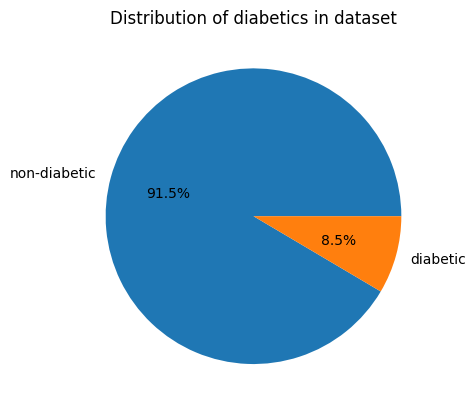

In [7]:
plt.pie(data['diabetes'].value_counts(), labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()

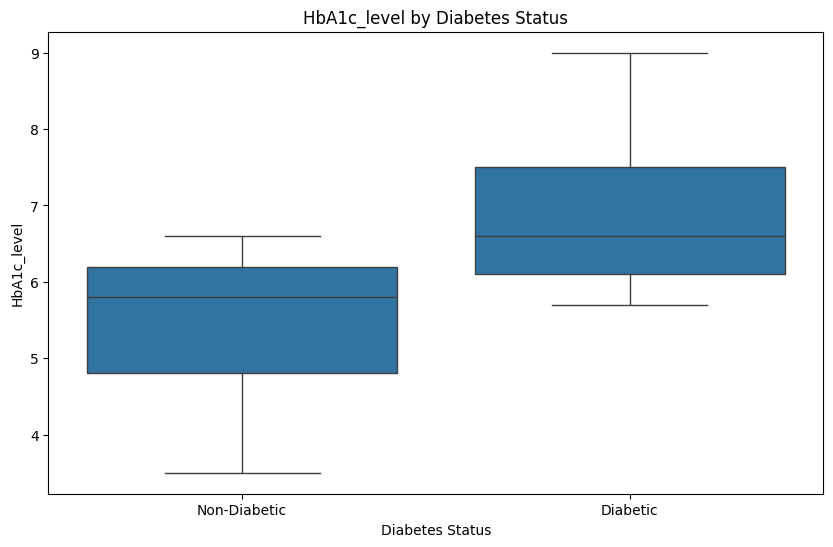

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c_level by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('HbA1c_level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

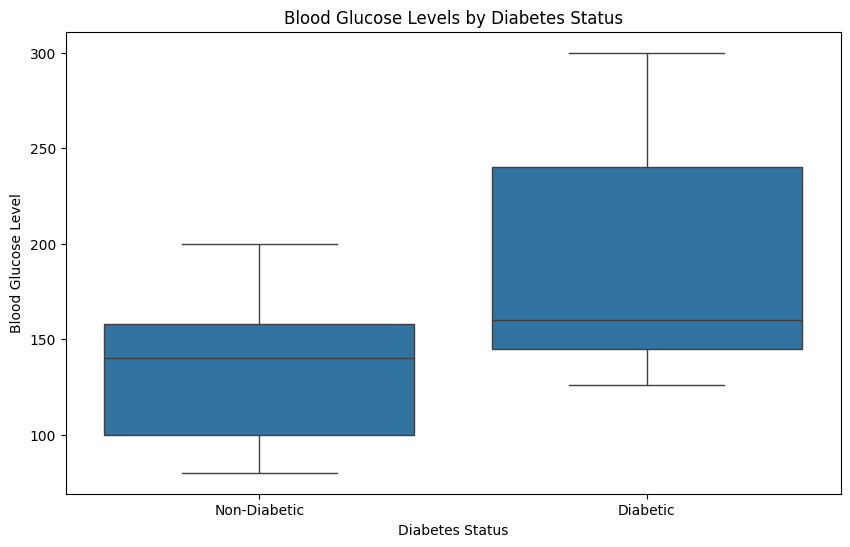

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Levels by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Blood Glucose Level')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

In [10]:
missing_values = data.isnull().sum().sum()
percentage_missing = (missing_values / data.shape[0]) * 100
print("Percentage of missing values:", percentage_missing)

Percentage of missing values: 0.0


In [11]:
label_encoder = preprocessing.LabelEncoder()
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.00,0,1,4,25.19,6.60,140,0
1,0,54.00,0,0,0,27.32,6.60,80,0
2,1,28.00,0,0,4,27.32,5.70,158,0
3,0,36.00,0,0,1,23.45,5.00,155,0
4,1,76.00,1,1,1,20.14,4.80,155,0


In [12]:
numeric_data = data.select_dtypes(include='number')
print(numeric_data)

       gender   age  hypertension  heart_disease  smoking_history   bmi  \
0           0 80.00             0              1                4 25.19   
1           0 54.00             0              0                0 27.32   
2           1 28.00             0              0                4 27.32   
3           0 36.00             0              0                1 23.45   
4           1 76.00             1              1                1 20.14   
...       ...   ...           ...            ...              ...   ...   
99995       0 80.00             0              0                0 27.32   
99996       0  2.00             0              0                0 17.37   
99997       1 66.00             0              0                3 27.83   
99998       0 24.00             0              0                4 35.42   
99999       0 57.00             0              0                1 22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0             6.60                  140        

In [13]:
numerical_columns = ['age', 'bmi', 'HbA1c_level','smoking_history', 'blood_glucose_level']

In [14]:
z_scores = data[numerical_columns].apply(zscore)

print(z_scores)

        age   bmi  HbA1c_level  smoking_history  blood_glucose_level
0      1.69 -0.32         1.00             0.96                 0.05
1      0.54 -0.00         1.00            -1.15                -1.43
2     -0.62 -0.00         0.16             0.96                 0.49
3     -0.26 -0.58        -0.49            -0.62                 0.42
4      1.52 -1.08        -0.68            -0.62                 0.42
...     ...   ...          ...              ...                  ...
99995  1.69 -0.00         0.63            -1.15                -1.18
99996 -1.77 -1.50         0.91            -1.15                -0.93
99997  1.07  0.08         0.16             0.43                 0.42
99998 -0.79  1.22        -1.43             0.96                -0.93
99999  0.67 -0.74         1.00            -0.62                -1.18

[100000 rows x 5 columns]


In [15]:
threshold = 3
outliers = data[z_scores > threshold]
print(outliers)

       gender  age  hypertension  heart_disease  smoking_history  bmi  \
0         NaN  NaN           NaN            NaN              NaN  NaN   
1         NaN  NaN           NaN            NaN              NaN  NaN   
2         NaN  NaN           NaN            NaN              NaN  NaN   
3         NaN  NaN           NaN            NaN              NaN  NaN   
4         NaN  NaN           NaN            NaN              NaN  NaN   
...       ...  ...           ...            ...              ...  ...   
99995     NaN  NaN           NaN            NaN              NaN  NaN   
99996     NaN  NaN           NaN            NaN              NaN  NaN   
99997     NaN  NaN           NaN            NaN              NaN  NaN   
99998     NaN  NaN           NaN            NaN              NaN  NaN   
99999     NaN  NaN           NaN            NaN              NaN  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
0              NaN                  NaN       NaN  
1              NaN 

In [16]:
outliers_count = (z_scores.abs() > threshold).sum().sum()

print("Number of outliers:", outliers_count)

Number of outliers: 4012


In [17]:
scaler = MinMaxScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())

   gender  age  hypertension  heart_disease  smoking_history  bmi  \
0       0 1.00             0              1             0.80 0.18   
1       0 0.67             0              0             0.00 0.20   
2       1 0.35             0              0             0.80 0.20   
3       0 0.45             0              0             0.20 0.16   
4       1 0.95             1              1             0.20 0.12   

   HbA1c_level  blood_glucose_level  diabetes  
0         0.56                 0.27         0  
1         0.56                 0.00         0  
2         0.40                 0.35         0  
3         0.27                 0.34         0  
4         0.24                 0.34         0  


In [18]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.00,0,1,0.80,0.18,0.56,0.27,0
1,0,0.67,0,0,0.00,0.20,0.56,0.00,0
2,1,0.35,0,0,0.80,0.20,0.40,0.35,0
3,0,0.45,0,0,0.20,0.16,0.27,0.34,0
4,1,0.95,1,1,0.20,0.12,0.24,0.34,0


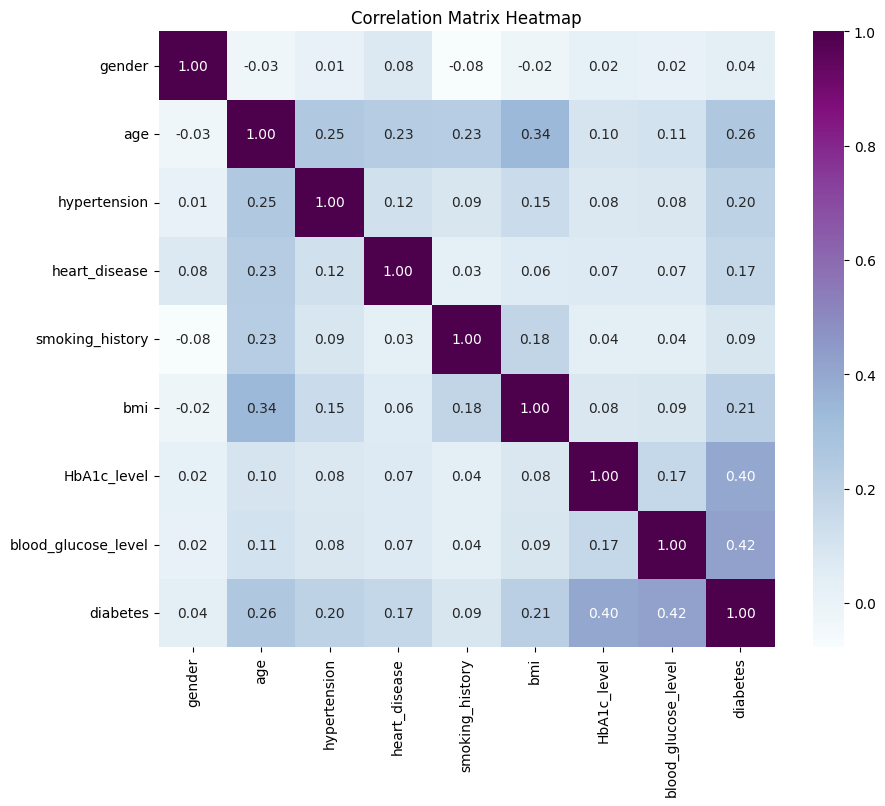

In [53]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuPu', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Splitting the data

In [20]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

In [21]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train = pd.DataFrame((X_train_raw), columns=X_train_raw.columns)
X_test =  pd.DataFrame((X_test_raw), columns=X_test_raw.columns)
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,0.16,0,0,0.00,0.13,0.42,0.21
80184,0,0.04,0,0,0.00,0.13,0.27,0.30
19864,1,0.79,0,0,0.60,0.18,0.00,0.55
76699,0,0.02,0,0,0.80,0.09,0.47,0.21
92991,0,0.41,0,0,1.00,0.35,0.49,0.55


# Feature Engineering

In [23]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [24]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()

n_components_90 = (cumulative_variance <= 0.90).sum()

print("Number of components to explain 90% variance:", n_components_90)


Number of components to explain 90% variance: 5


In [25]:
pca = PCA(n_components=5, random_state=42)
pca.fit(X_train)

X_train_PCA = pd.DataFrame(pca.transform(X_train))
X_test_PCA = pd.DataFrame(pca.transform(X_test))

In [26]:
X_train_PCA.columns = [str(column_name) for column_name in X_train_PCA.columns]
X_test_PCA.columns = [str(column_name) for column_name in X_test_PCA.columns]

In [27]:
X_train_PCA.head()

,0,1,2,3,4
0,0.58,0.06,-0.01,-0.11,-0.06
1,0.51,0.47,-0.09,-0.19,-0.33
2,-0.37,-0.39,-0.13,0.07,-0.26
3,-0.38,-0.22,0.20,-0.17,0.17
4,0.66,-0.46,-0.13,0.12,0.02


# Decision Tree Algorithm

## Decison tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
drt = DecisionTreeClassifier()
drt.fit(X_train_PCA, y_train)

print(f'Training score : {drt.score(X_train_PCA, y_train)}')
print(f'Testing score : {drt.score(X_test_PCA, y_test)}')

Training score : 0.9993142857142857
Testing score : 0.9366666666666666


In [31]:
y_pred_test = drt.predict(X_test_PCA)
y_pred_train= drt.predict(X_train_PCA)

In [32]:
train_decision_tree_report = classification_report(y_train, y_pred_train)
print(train_decision_tree_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64047
           1       1.00      0.99      1.00      5953

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [33]:
test_decision_tree_report = classification_report(y_test, y_pred_test)
print(test_decision_tree_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     27453
           1       0.63      0.62      0.62      2547

    accuracy                           0.94     30000
   macro avg       0.80      0.79      0.79     30000
weighted avg       0.94      0.94      0.94     30000



### Results

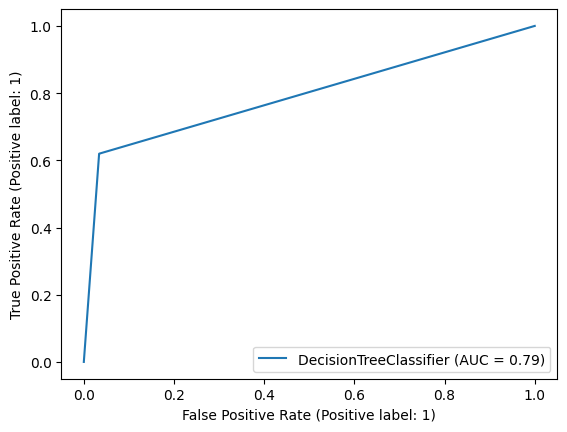

In [35]:
RocCurveDisplay.from_estimator(drt, X_test_PCA, y_test)
plt.show()

In [36]:
roc_auc_score(y_test, y_pred_test)

0.7928199547984289

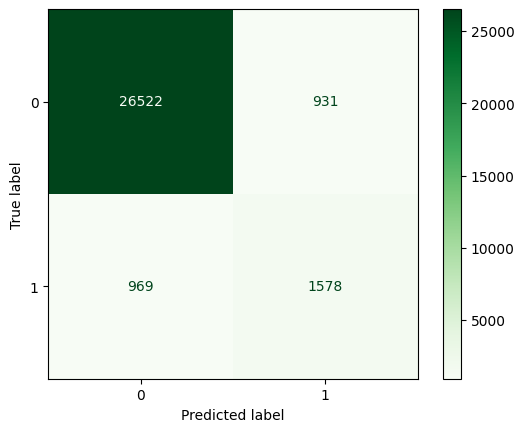

In [54]:
cm = confusion_matrix(y_test, y_pred_test, labels=drt.classes_);
ConfusionMatrixDisplay.from_predictions(y_pred=y_pred_test, y_true=y_test, display_labels=drt.classes_, cmap='Greens');

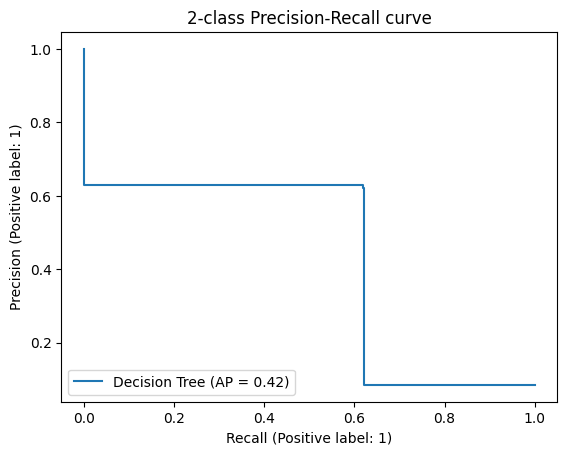

In [41]:
display = PrecisionRecallDisplay.from_estimator(drt, X_test_PCA, y_test, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Using Entropy and Gini Index

In [42]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(X_train_PCA, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [43]:
Gsearch_dt.best_score_

0.9595142857142855

In [44]:
Gsearch_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [45]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10],
       "min_samples_split":[10,50,100],
       "min_samples_leaf":[70,80,90,100,110]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(X_train_PCA, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [70, 80, 90, 100, 110],
                         'min_samples_split': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
Gsearch_dt.best_score_

0.9583428571428572

In [47]:
Gsearch_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 80,
 'min_samples_split': 100}

### Results

In [48]:
drt1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 70, min_samples_split= 10)

drt1.fit(X_train_PCA, y_train)

print(f'Training score : {drt1.score(X_train_PCA, y_train)}')
print(f'Testing score : {drt1.score(X_test_PCA, y_test)}')

Training score : 0.9567142857142857
Testing score : 0.9538666666666666


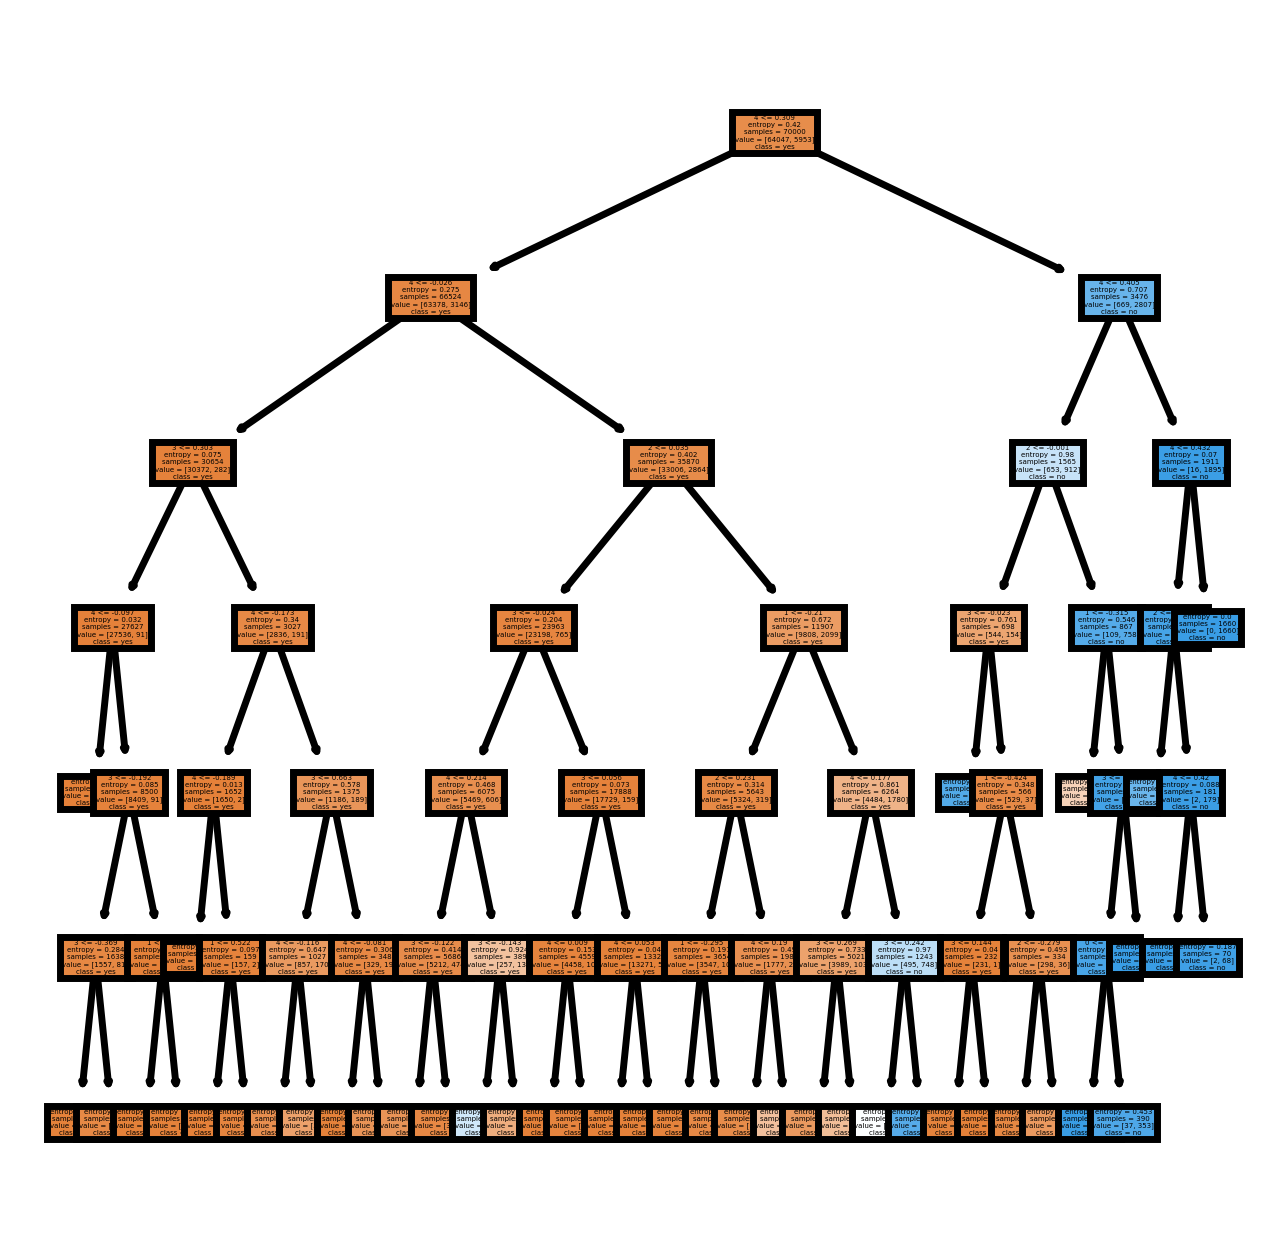

In [55]:
from sklearn.tree import plot_tree

fn=X_train_PCA.columns

cn=["yes","no"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(drt1,
           feature_names = fn,
           class_names=cn,
           filled = True);


In [50]:
drt2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_leaf= 50, min_samples_split= 10)

drt2.fit(X_train_PCA, y_train)

print(f'Training score : {drt2.score(X_train_PCA, y_train)}')
print(f'Testing score : {drt2.score(X_test_PCA, y_test)}')

Training score : 0.9586428571428571
Testing score : 0.9565333333333333


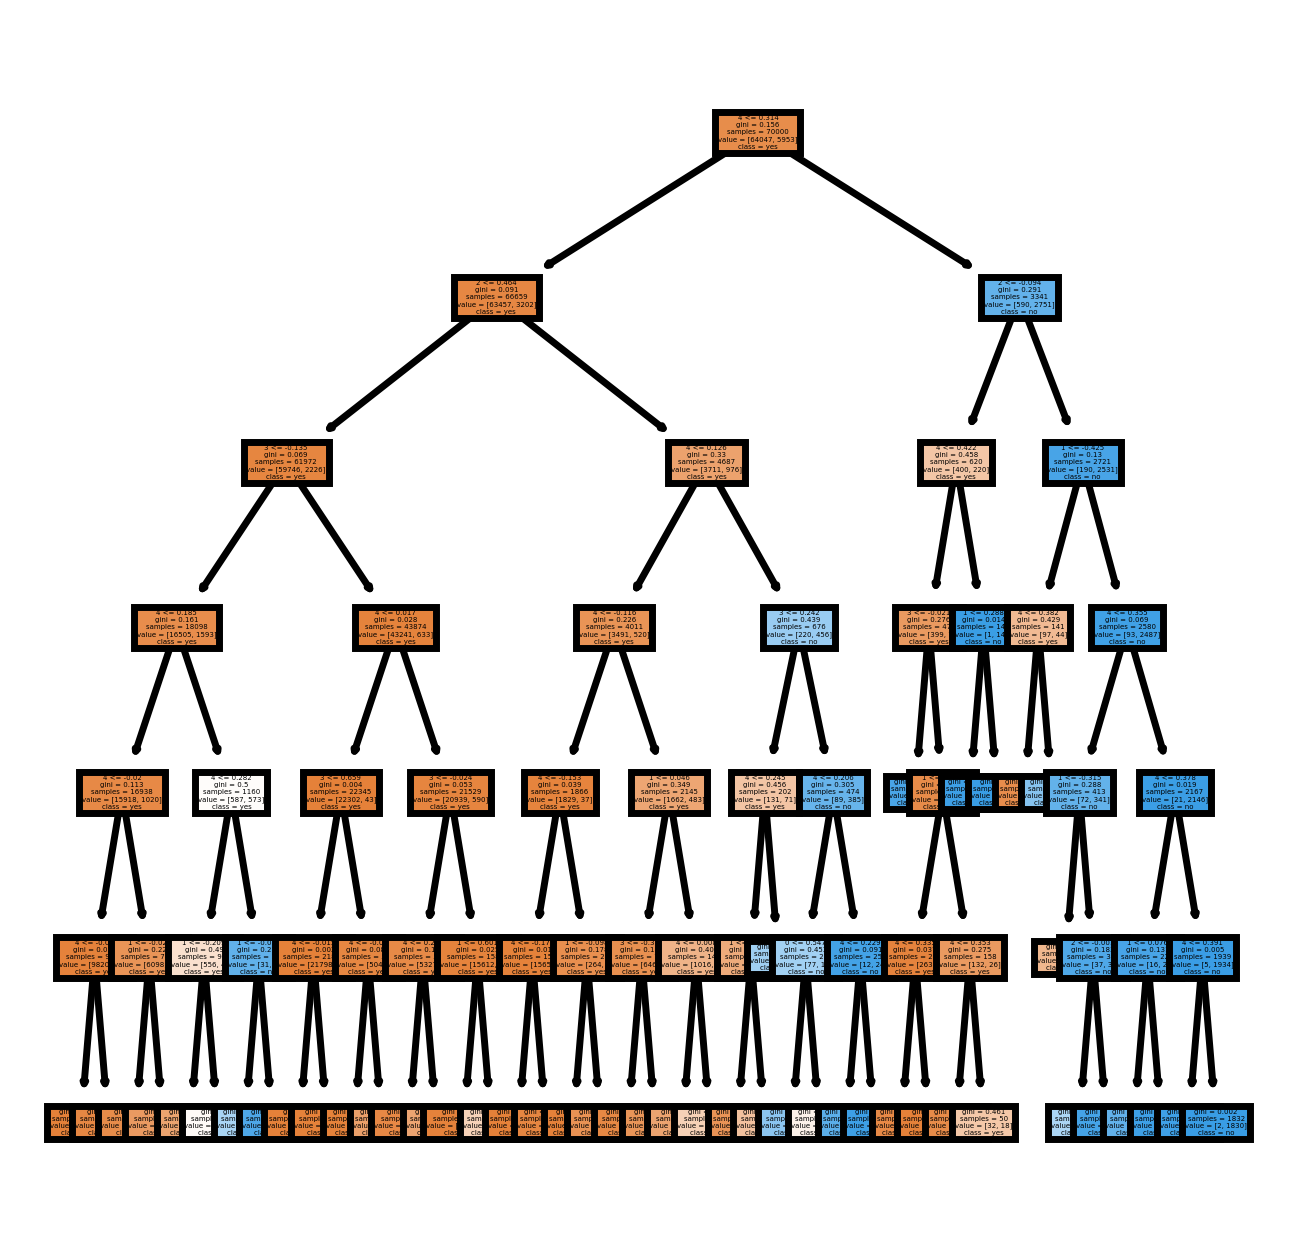

In [56]:
from sklearn.tree import plot_tree

fn=X_train_PCA.columns

cn=["yes","no"]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(drt2,
           feature_names = fn,
           class_names=cn,
           filled = True);